In [1]:
#importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#geting the data in a variable
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#getting basic info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#getting only column name of the data set
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#removing unnecessary columns of the data set to make it more clean 
data.drop(['PassengerId', 'Name',  'Ticket', 'Fare','Cabin'], axis=1, inplace=True)

In [6]:
#after removing unnecessary columns 
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [7]:
#to know the unique values in survived column  
data["Survived"].unique()

array([0, 1])

In [8]:
#here are two types of value which is 0 and 1 
#can consider 0 as not survived and 1 as survived 

In [9]:
#to know the no. of values 
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
#here getting 549 are not servived and 342 are survived.

<Axes: xlabel='Survived', ylabel='count'>

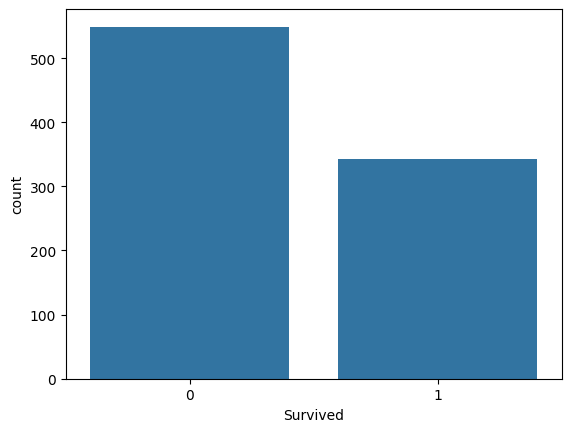

In [11]:
#build a countplot of survived column
sns.countplot(data=data, x='Survived')

In [12]:
#to know how may male and female in the dataset
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
#here we can see that 577 male and 314 female are in that

<Axes: xlabel='Sex', ylabel='count'>

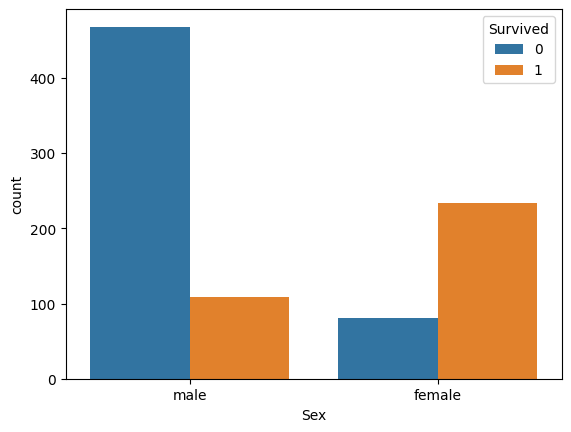

In [14]:
#to visualize the survived people's by gender
sns.countplot(data=data, x='Sex', hue='Survived')

In [15]:
#to know how may passengers are in the dataset
data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
#here we can see the there are mainly 3 classes
#so in 1st class there are 216 passengers , 2nd class there are 184 passengers, 3rd class there are 491 passengers

<Axes: xlabel='Survived', ylabel='count'>

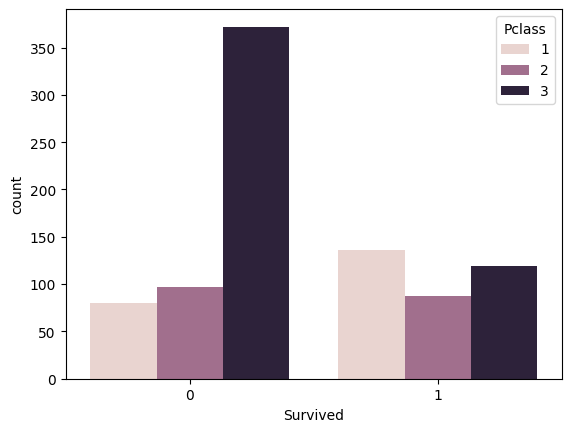

In [17]:
#to visualize the survived people's by passenger class
sns.countplot(data=data, x = 'Survived', hue='Pclass')

In [18]:
#to check is the data is clean or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [19]:
#here we can see thet the 'SibSp' colume is useless so we are removing this column 
#and the age column have the null values because the values are less than other columns

In [20]:
data.drop(['SibSp'], axis=1, inplace=True)

<Axes: >

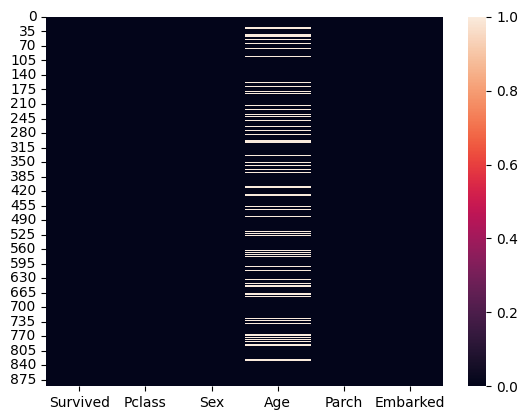

In [21]:
#looking for null values 
sns.heatmap(data.isnull())

In [22]:
#here we can see the age column is have many null values
#to overcome this problem need to analyse what is the pattern of age and pasenger class 

<Axes: xlabel='Pclass', ylabel='Age'>

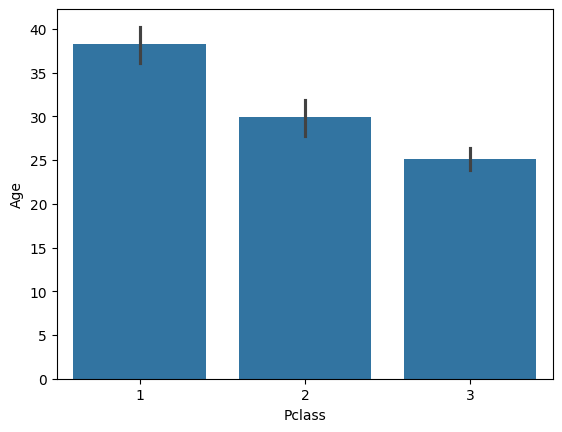

In [23]:
#to analyse the pattern creating a bar plot of age by pclass 
sns.barplot(x='Pclass', y='Age', data=data)

In [24]:
#here we can clearly see that the pattern
# age of passengers in pclass 1 is 35 to 40 which shows the they are well setteld 
# age of passengers in pclass 2 is 25 to 30 which shows the they are middel class  
# age of passengers in pclass 3 is 18 to 25 which shows the they student, teenage (dependent on parents money) 


In [25]:
#to overcome this creating a code for  a new age column 
def inputAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [26]:
data['New age'] = data[['Age', 'Pclass']].apply(inputAge, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_17412\2132121836.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_17412\2132121836.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [27]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Embarked,New age
0,0,3,male,22.0,0,S,22.0
1,1,1,female,38.0,0,C,38.0
2,1,3,female,26.0,0,S,26.0
3,1,1,female,35.0,0,S,35.0
4,0,3,male,35.0,0,S,35.0


In [28]:
#now we dont need age column so we are deleting that column
data.drop(['Age'], inplace=True, axis=1)

In [29]:
data.head()

,Survived,Pclass,Sex,Parch,Embarked,New age
0,0,3,male,0,S,22.0
1,1,1,female,0,C,38.0
2,1,3,female,0,S,26.0
3,1,1,female,0,S,35.0
4,0,3,male,0,S,35.0


In [30]:
#here all dataset is allright but the "sex" and "embarked" is not numarical
#this may cause error in the model ,
#to overcome this situation we need to convert it into numaric 

In [31]:
sex = pd.get_dummies(data['Sex'], drop_first=True).astype(int)
emb = pd.get_dummies(data['Embarked'], drop_first=True).astype(int)

In [32]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [33]:
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
#so we got the data now ataching the column in the data set
data = pd.concat([data, sex, emb], axis=1)

In [35]:
data.head()

,Survived,Pclass,Sex,Parch,Embarked,New age,male,Q,S
0,0,3,male,0,S,22.0,1,0,1
1,1,1,female,0,C,38.0,0,0,0
2,1,3,female,0,S,26.0,0,0,1
3,1,1,female,0,S,35.0,0,0,1
4,0,3,male,0,S,35.0,1,0,1


In [36]:
#removing Sex, Embarked,Q colume as they are not importent from  now on
data.drop(['Sex', 'Embarked','Q'], axis=1, inplace=True)

In [37]:
data.head()

,Survived,Pclass,Parch,New age,male,S
0,0,3,0,22.0,1,1
1,1,1,0,38.0,0,0
2,1,3,0,26.0,0,1
3,1,1,0,35.0,0,1
4,0,3,0,35.0,1,1


In [38]:
data.columns

Index(['Survived', 'Pclass', 'Parch', 'New age', 'male', 'S'], dtype='object')

In [39]:
#preparing to train test split the dataset

In [40]:
#this will select all the columns
x=data.iloc[:,1:]

In [41]:
#this will select only target column which is -survived
y=data['Survived']

In [42]:
#importing train test split model to train and test the dataset
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=104 ,test_size=0.4) 

In [44]:
#now the data is splited into train and test 
#chossing Logistic Regression  as the classification model due to its suitability for binary(the data is in 0 and 1 form) classification problems
#importing logistic regration model

from sklearn.linear_model import LogisticRegression

In [45]:

#asigning lr variable as logisticregration 
lr = LogisticRegression() 

In [46]:
#filing the training  data in model 
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Store the predictions in y_pred.
y_pred = lr.predict(x_test)

In [48]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [49]:
y_test

500    0
199    0
158    0
352    0
387    1
      ..
678    0
220    1
582    0
265    0
362    0
Name: Survived, Length: 357, dtype: int64

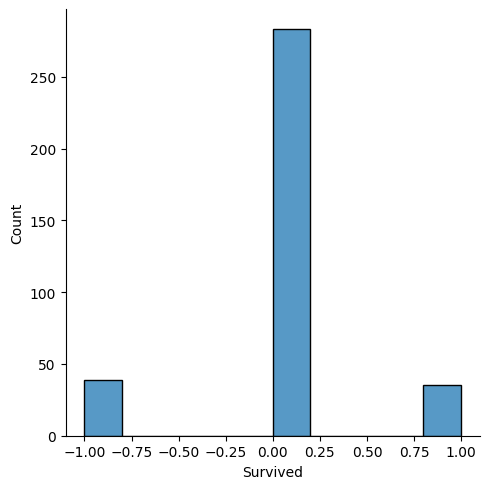

In [ ]:
#to chack the model accuracy by loking at the difference of actual values by pridicted values
sns.displot(y_test-y_pred)

In [ ]:
#Analysis of residual distribution plot indicates model's prediction is generally accurate

In [53]:
#again evaluating the model by apling confution matrix on the actual and pridicted values
from sklearn.metrics import confusion_matrix

In [55]:
cm = confusion_matrix(y_test,y_pred)
print("confution metrix")
print(cm)

confution metrix
[[190  39]
 [ 35  93]]


In [57]:
#calculating accuracy score ,prision score ,recall score and f1 score
#importion all from sklearn library
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
accuracy=accuracy_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)
#printing all the scoress
print(f"\naccuracy_score:{accuracy:.4f}")
print(f"pecision_score: {precision:.4f}")
print(f"recall_score {recall:.4f}")
print(f"f1_score:{f1:.4f}")


accuracy_score:0.7927
pecision_score: 0.7266
recall_score 0.7045
f1_score:0.7154


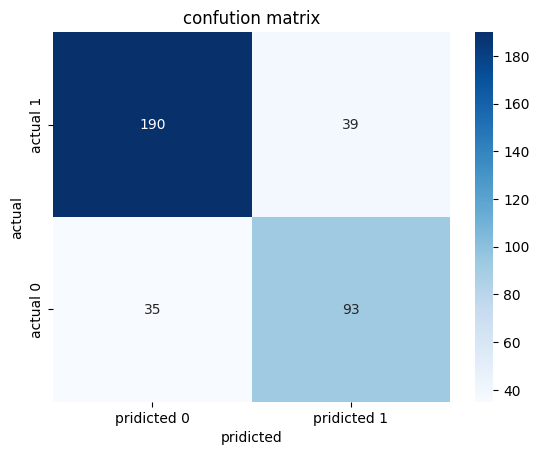

In [64]:
#ploting a heatmap to visualise the confution matrics
sns.heatmap(cm , annot=True, fmt="d", cmap="Blues",xticklabels=["pridicted 0","pridicted 1"],yticklabels={"actual 0","actual 1"})
plt.title("confution matrix")
plt.xlabel("pridicted")
plt.ylabel("actual")
plt.show()
